In [72]:
import pandas as pd
import numpy as np
import os
import re
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
MASK = "$T$"

In [74]:
main_folder = os.path.dirname(os.getcwd())
path = os.path.join(main_folder, "strise", "STEP 2 - CSV_WITH_SENTIMENT")
path

'C:\\Users\\Tollef\\Documents\\GitHub\\masterNEW\\REPO\\strise\\STEP 2 - CSV_WITH_SENTIMENT'

In [77]:
ent_df = pd.read_csv(os.path.join(path, "entities.csv"))
ent_df.head()
ent_df.shape

(59199, 10)

## Plotting

In [78]:
def hist_plot(df, col, bins=500):
    _ = plt.hist(df[col], bins=bins)

## Feature management

- Text length
- Sentiment

### Text length

In [79]:
def calc_text_length(row):
    row['text_length'] = len(row['text'])
    return row

# add text length as a column
def add_text_length(df):
    df["text_length"] = np.nan
    return df.apply(lambda row: calc_text_length(row), axis=1)

ent_df = add_text_length(ent_df)

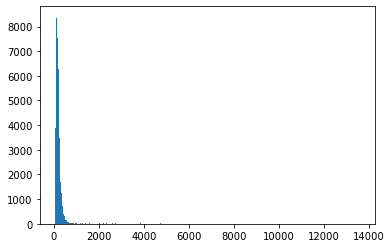

In [80]:
hist_plot(ent_df, "text_length", bins = 500)

Original shape: (59199, 11)
keeping text lengths within 80% of the distribution
min: 87.0, max: 319.0
Dropping 11960 rows
New shape: (47239, 11)


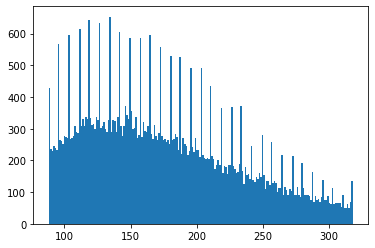

In [81]:
def shorten_texts(df):
    print("Original shape:", df.shape)
    q_min, q_max = (df['text_length'].dropna().quantile([0.1, 0.9]))
    print('keeping text lengths within 80% of the distribution')
    print('min: {}, max: {}'.format(q_min, q_max))
    shortened_texts = df[(df.text_length > q_min) & (df.text_length < q_max)]
    print('Dropping {} rows'.format(df.shape[0] - shortened_texts.shape[0]))
    df = shortened_texts
    print("New shape:", df.shape)
    return df

ent_df = shorten_texts(ent_df)
hist_plot(ent_df, "text_length", bins = 200)

### Sentiment
Findings show that the labeled dataset is _extremely_ balanced

In [82]:
sent_vals = ent_df.sentiment.unique()
sent_range = [min(sent_vals), max(sent_vals)]

 0    16417
 1    16371
-1    14451
Name: sentiment, dtype: int64


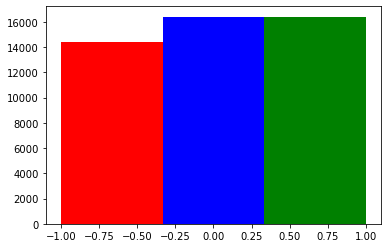

In [83]:
def sentiment_distribution(df):
    dist = df.sentiment.value_counts()
    print(dist)
    n, bins, sentiments = plt.hist(df.sentiment, range=sent_range, bins=3)
    NEG = 'r'
    NEU = 'b'
    POS = 'g'
    sentiments[0].set_fc(NEG)
    sentiments[1].set_fc(NEU)
    sentiments[2].set_fc(POS)

sentiment_distribution(ent_df)

In [92]:
def get_opinion_extremes(df, sent, top=10):
    df = df[df.sentiment==sent].sort_values(by='sentiment_score', ascending=False)[:10]
    for n, v in zip(df.name.values, df.text.values):
        print(v)
        print("---", n)
        print()

In [93]:
get_opinion_extremes(ent_df, -1)

After all of the IOTA infrastructure is set in place (JINN ternary processors and an IOTA related AI), it will make no sense to $T$ into 3.
--- Go

He wrote that the network was on the brink of technical $T$ The mechanisms that should have prevented this outcome have broken down, and as a result no longer much reason to think Bitcoin can actually be better than the existing financial system.
--- societal collapse

How confident is it that the $T$ won't be 2.77 per cent or 1.85 per cent Given that historical analyses of such forecasts find they're often off by a magnitude of one to two percentage points, the second and especially third digits look pretty meaningless.
--- prediction

All that piling up has resulted in ROL tangible book value per $T$ turning negative, severely so at -$0.44.
--- stock

Furthermore, let's compare Bremelanotide's safety profile to that of its competitor, Addyi Legitimate Concern Vyleesi May Fail Because Addyi Was a Flop Addyi was a $T$ developed by Sprout Ph

In [31]:
get_opinion_extremes(ent_df, 0)

['2 Diosdado Cabello, the elder brother of late $T$ Hugo Chavez, and 16 firms in Venezuela.', 'The manufacturers of pole vault equipment are focusing on developing poles made of $T$ (Glass Fiber Reinforced Polymer) composites.', 'Birmingham $T$ Bob Blackburn, but that all changed when presidential candidate Robert Kennedy was shot 50 years ago.', "Blackburn's Baggies reports became near legendary among fans - and he was such a part of the club that the reporter appeared in a 1966 $T$ Argus cartoon.", 'The Black Country reporter became such an ever-present at LA $T$ conferences that one US magazine did a story on him', 'The Black Country reporter became such an ever-present at $T$ press conferences that one US magazine did a story on him', "On it, Keith writes The 'Blackburn Blackburn' byline was a familiar $T$ to readers of the Birmingham Mail, Sandwell Evening Mail, .", 'And remember - these were days before continents were bridged by simply pressing the send $T$ on a laptop.', 'From 

In [32]:
get_opinion_extremes(ent_df, 1)

['I have seen the benefits of this way of thinking in my own life and am very passionate about helping $T$ see the value of gentleness with their bodies, and to help them foster balance.', 'Apart from the established markets such as Canada, Japan, Italy, the U.K., Ireland, Switzerland and South Korea, the emerging markets like Brazil, $T$ Indonesia and Turkey have been delivering solid performances.', 'The $T$ we provide is quality, consistent health products that we know are effective in improving lives.', 'Overall, I am very pleased with these results as they increase the $T$ of the asset and are important to our growth strategy.', 'And they have plenty to choose from, with Apple, Samsung and $T$ all bringing out some fantastic options.', "It's a neat $T$ It's an accomplishment, Huseman said, of the relatives who came before him and managed to keep it going through economic highs and lows like the Great Depression.", '$T$ has demonstrated the power of Chinese people to the world with

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
train, test = train_test_split(ent_df, test_size=0.1, random_state=1337, stratify=ent_df[["sentiment"]])

 0    14775
 1    14734
-1    13006
Name: sentiment, dtype: int64


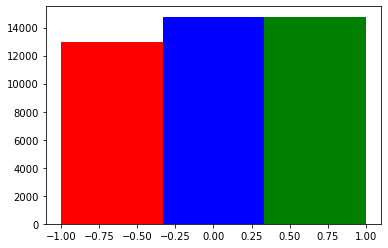

In [96]:
sentiment_distribution(train)

 0    1642
 1    1637
-1    1445
Name: sentiment, dtype: int64


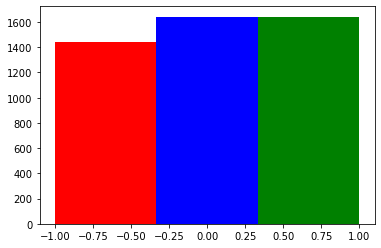

In [97]:
sentiment_distribution(test)

In [98]:
test

,Unnamed: 0,id,entity_id,name,description,text,references,offset,sentiment,sentiment_score,text_length
56121,0,IjY1NzU1Nzg4MGYxNTdjZjQwMzFhYjQzMThjZjRlODAzNT...,Q577,year,orbital period of the Earth around the Sun,-- Additional Published Data Demonstrate Poten...,"annum,a,anno",1104,1,0.9979,314
39356,3,ImRkMDkzYzYwNmI1YzQ4OGNhMTU3ZGU2MGZkM2E2OTEwMD...,Q41323,American football,a form of team game played with an oval ball o...,The Star is counting down the 11 most valuable...,"American rules football,🏈,football,gridiron fo...",71,1,0.9810,105
44893,14,ImJkM2RlYzBlN2MwYTU5ZmQzNGZiOWU0NmZjZGQzMzhlOG...,Q12638,gross domestic product,market value of goods and services produced wi...,Stepan Kubiv stressed the real $T$ in 2017 com...,GDP,2215,0,0.6910,150
22474,9,ImVmZWJiMDAwYWIwMzdmZTdjMDFmNjI3ZWQ4MDNmNWY2Nm...,Q52389,tariff,tax on the import and export of goods,And even though U.S. President Donald Trump su...,"tariffs,customs duty,Tax, tariff and trade,tar...",119,0,1.0000,194
8779,9,IjhmZGEyMDNiMzJlYjUxZTM5NTlhZjQ1ZGNiNWM0YjYyND...,Q668,India,federal republic in South Asia,"Loan melas are an extension of social banking,...","🇮🇳,Republic of India,in,IN,Bharat,IND,Hindusta...",1589,0,1.0000,158
...,...,...,...,...,...,...,...,...,...,...,...
53515,0,IjdhYjA1ODViMGYwMDMzMmRiYTA0ZTdlN2NiNjJiZjA2M2...,Q185142,initial public offering,type of public offering,"Jackal Pan Getty With the $T$ paused for now, ...","IPO,going public",157,0,1.0000,166
31835,42,ImEyN2RjZjI3ZThlOGY0NzU5YWM4NDI0MTViYjM5OGU2Nz...,Q901312,Greasemonkey,Mozilla Firefox extension,Nutanix has upgraded the quality of its revenu...,"GreaseMonkey,userscript,user script,GM",765,0,1.0000,137
55829,30,Ijg0Y2JhNzc4MmU2ZTVhN2I5ZmM5MzM3NmRmODQ1OTRhM2...,Q191145,scaling,geometric transformation that enlarges (increa...,The Competitive Strategic Window helps the ven...,"dilation,growth,enlargement,similarity,resizin...",2201,1,0.9870,147
17777,18,ImJmYzcwYjYxOGJjOGJjMzg0MzgxMjk3NjU5NTg2MDgwNj...,Q907655,Iraqi Republic Railways,national railway operator in Iraq,"Based on the Company's 2017 PEA, economics of ...","Iraqi State Railways,ISR,IRR",2786,1,0.9996,256


In [99]:
# the DFs in the correct .xml.seg format, based around ACL14 and SemEval14
# TEXT
# TARGET
# SENTIMENT

def _write(f, data):
    f.write(data)
    f.write("\n")
    
def save_row(f, row):
    text = row['text']
    sentiment = str(row['sentiment'])
    target = row['name']

    _write(f, text)
    _write(f, target)
    _write(f, sentiment)


In [100]:
save_folder = "STEP 3 - ABSA-format"
save_path = os.path.join(os.getcwd(), save_folder)

train_path = os.path.join(save_path, "distant_supervision_train.seg")
test_path = os.path.join(save_path, "distant_supervision_test.seg")

In [101]:
with open(train_path, 'w', encoding="utf8") as f:
    [save_row(f, row) for idx, row in train.iterrows()]

In [102]:
with open(test_path, 'w', encoding="utf8") as f:
    [save_row(f, row) for idx, row in test.iterrows()]

In [106]:
both = pd.concat([train, test])

In [109]:
both_path = os.path.join(save_path, "distant_supervision_big.seg")
with open(both_path, 'w', encoding="utf8") as f:
    [save_row(f, row) for idx, row in both.iterrows()]